# Выбор локации для скважины

## Загрузка и подготовка данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState

In [2]:
# чтение файла с данными и сохранение в df с использованием конструкции try-except
try:
    df_zero = pd.read_csv('C:/Users/datasets/geo_data_0.csv') # локальный путь
    df_one = pd.read_csv('C:/Users/datasets/geo_data_1.csv')
    df_two = pd.read_csv('C:/Users/datasets/geo_data_2.csv')
except:
    df_zero = pd.read_csv('/datasets/geo_data_0.csv') # серверный путь
    df_one = pd.read_csv('/datasets/geo_data_1.csv')
    df_two = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
# просмотр первых 3 строк таблицы df_zero
df_zero.head(3)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647


In [4]:
# просмотр первых 3 строк таблицы df_one
df_one.head(3)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305


In [5]:
# просмотр первых 3 строк таблицы df_two
df_two.head(3)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910


In [6]:
# получение общей информации о данных
data = [df_zero, df_one, df_two]
for df in data:
    print(df.info())
    print('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memor

Посмотрим на распределение запасов нефти по регионам, построив "ящик с усами".

In [7]:
# создание таблицы с запасами нефти в каждом регионе
product = pd.concat([df_zero['product'], df_one['product'], df_two['product']], axis=1)
product.columns = ['product_0', 'product_1', 'product_2']

product

,product_0,product_1,product_2
0,105.280062,3.179103,27.758673
1,73.037750,26.953261,56.069697
2,85.265647,134.766305,62.871910
3,168.620776,137.945408,114.572842
4,154.036647,134.766305,149.600746
...,...,...,...
99995,110.744026,53.906522,172.327046
99996,122.346843,137.945408,138.748846
99997,64.375443,137.945408,157.080080
99998,74.040764,30.132364,51.795253


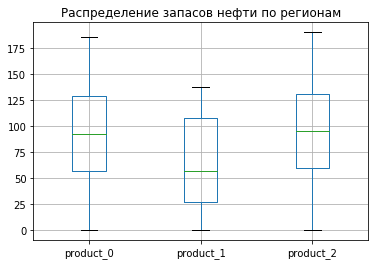

In [8]:
# график распределения запасов нефти по регионам
product.boxplot()
plt.title('Распределение запасов нефти по регионам');

Данные трех таблиц содержат по 5 столбцов и 100000 строк. Пропусков не обнаружено.

## Обучение и проверка модели

Создадим функцию, которая делит данные  на обучающую и валидационную выборки, обучает модель и делает предсказания на валидационной выборке, рассчитывает средний запас предсказанного сырья и RMSE модели.

In [9]:
# создание функции
def train_predictions(df):
    features = df.drop(['product','id'], axis=1)
    target = df['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, 
                                                                                  random_state=12345)
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    predictions = pd.Series(predictions)
    rmse = (mean_squared_error(predictions, target_valid))**(0.5)
    average_product = sum(predictions) / len(predictions)
    print('RMSE', rmse)
    print('Cредний запас предсказанного сырья', average_product)
    return rmse, target_valid.reset_index(drop=True), predictions 

In [10]:
# сохранение предсказаний и правильных ответов на валидационной выборке и RMSE
rmse_0, target_0, predictions_0 = train_predictions(df_zero)
rmse_1, target_1, predictions_1 = train_predictions(df_one)
rmse_2, target_2, predictions_2 = train_predictions(df_two)

RMSE 37.5794217150813
Cредний запас предсказанного сырья 92.59256778438008
RMSE 0.893099286775616
Cредний запас предсказанного сырья 68.7285468954458
RMSE 40.02970873393434
Cредний запас предсказанного сырья 94.96504596800506


In [11]:
# вывод на экран по каждому региону RMSE и среднего запаса предсказанного сырья
i=0
for df in data:
    print('Регион', i)
    i+=1
    train_predictions(df)
    print('')

Регион 0
RMSE 37.5794217150813
Cредний запас предсказанного сырья 92.59256778438008

Регион 1
RMSE 0.893099286775616
Cредний запас предсказанного сырья 68.7285468954458

Регион 2
RMSE 40.02970873393434
Cредний запас предсказанного сырья 94.96504596800506



Набольший средний запас предсказанного сырья получился у региона 2 (94.96), при этом и значение RMSE у данного региона самое высокое (40.03). Самое низкое значение RMSE получилось у региона 1 (0.89), что меньше более чем в 40 раз чем у региона 2.

## Подготовка к расчёту прибыли

In [12]:
# сохранение значений в отдельных переменных
Budget = 10**10
Income = 450000

Точка безубыточности — это объём продаж товаров или услуг, при котором доход компании равен ее затратам. Следовательно, чтобы найти точку безубыточности надо наш бюджет затрат разделить на доход  с каждой единицы продукта.

In [13]:
# рассчет точки безубыточности
break_even = Budget / Income
print('Точка безубыточности', '{:.0f}'.format(break_even), 'тыс. баррелей')

Точка безубыточности 22222 тыс. баррелей


In [14]:
# расчет достаточного объёма сырья для безубыточной разработки новой скважины
np.ceil(break_even/200)

112.0

Среднего запаса сырья недостаточно для безубыточной разработки новой скважины.

## Расчёт прибыли и рисков 

In [15]:
# создание функции для расчёта прибыли по выбранным скважинам и предсказаниям модели
def profit(predictions, target):
    max_predictions = predictions.sort_values(ascending=False)
    top_target = target[max_predictions.index][:200]
    revenue = top_target.sum() * Income
    return revenue - Budget

In [16]:
# проверка
for preds, target in zip([predictions_0, predictions_1, predictions_2], [target_0, target_1, target_2]):
    print(profit(preds, target))

3320826043.1398525
2415086696.681511
2710349963.5998325


In [19]:
# создание функции для создания подвыборок, расчета средней прибыли, 95%-ого доверительного интервала и риска убытков
state = RandomState(12345)

def profit_and_risk(predictions, target):
    revenue = []
    for i in range(1000):
        target_sample = target.sample(500, replace=True, random_state=state)
        predictions_sample = predictions[target_sample.index]
        revenue.append(profit(predictions_sample, target_sample))
    revenue = pd.Series(revenue)
    
    mean_revenue = sum(revenue) / len(revenue)
    print('Средняя прибыль', mean_revenue)
    
    lower = revenue.quantile(0.025)
    upper = revenue.quantile(0.975)
    print('95%-й доверительный интервал', (lower, upper))
    
    risk = (revenue < 0).mean()
    print('Риск убытков', risk)
    
    return mean_revenue, lower, upper, risk

In [20]:
# вывод полученных результатов
i=0
for preds, target in zip([predictions_0, predictions_1, predictions_2], [target_0, target_1, target_2]):
    print('Регион', i)
    i+=1
    profit_and_risk(preds, target)
    print('')

Регион 0
Средняя прибыль 425938526.910592
95%-й доверительный интервал (-102090094.83793654, 947976353.358369)
Риск убытков 0.06

Регион 1
Средняя прибыль 518259493.69732505
95%-й доверительный интервал (128123231.43308629, 953612982.0669085)
Риск убытков 0.003

Регион 2
Средняя прибыль 420194005.34404975
95%-й доверительный интервал (-115852609.16001143, 989629939.844574)
Риск убытков 0.062



Полученные результаты свидетельствуют о том, что для разработки скважин надо выбрать регион 1, поскольку у данного региона самый низкий риск получения убытков и наибольшая средняя прибыль.